Link to dataset download: https://www.kaggle.com/datasets/ashydv/housing-dataset?resource=download


## Importing data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("housing.csv") 

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Examining general gist of data
What's not super nice about this dataset is that it doesn't say anything about data collection...

In [3]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.shape

(545, 13)

In [6]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## 1-var linear regression

In [7]:
corr_matrix = df.corr()
df.corr()


,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [8]:
corr_matrix['price'].sort_values(ascending=False) 

price        1.000000
area         0.535997
bathrooms    0.517545
stories      0.420712
parking      0.384394
bedrooms     0.366494
Name: price, dtype: float64

<AxesSubplot:>

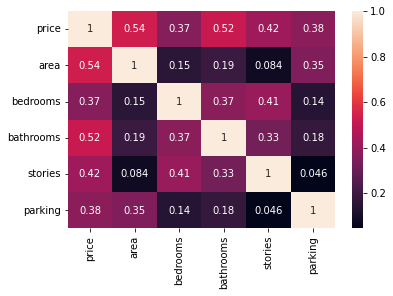

In [9]:
import seaborn as sns

sns.heatmap(corr_matrix, annot=True) # warning: correlation =/= causation (hint maybe look at what factors could implicate both)

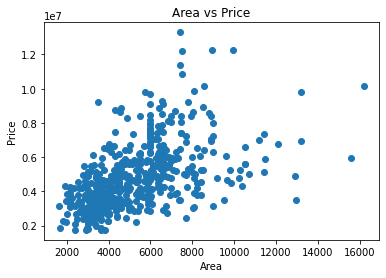

In [28]:
x = df["area"]
y = df["price"]

# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
plt.scatter(x, y) # most useful extra params: c, marker, alpha

plt.ylabel("Price")
plt.xlabel("Area")
plt.title("Area vs Price")

plt.show()


## Fitting the model

In [39]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# x = x.values.reshape(-1, 1)

model.fit(x, y)

y_pred = model.predict(x)


### Tangent :)

In [38]:
test_arr = np.array([[1, 2], [3, 4]])
print(test_arr)
test_arr = test_arr.reshape(-1, 1) # adds another dimension to the array
print(test_arr)

[[1 2]
 [3 4]]
[[1]
 [2]
 [3]
 [4]]


## Plotting line

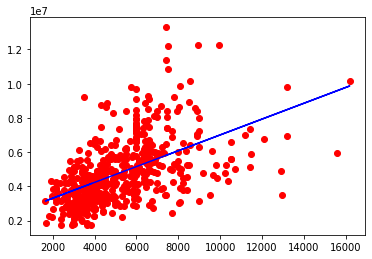

In [40]:
plt.plot(x, y, "or")
plt.plot(x, model.predict(x), "-b")

## Checking out eval metrics

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mean_squared_error(y, y_pred), mean_absolute_error(y, y_pred), r2_score(y, y_pred)

(2488861398180.6567, 1172305.5113148908, 0.2872931546811469)

## Ignore all of this stuff initially

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train) # model.intercept_, model.coef_

y_pred = model.predict(X_test)

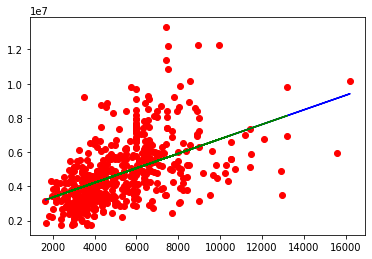

In [16]:
plt.plot(x, y, "or")
plt.plot(x, model.predict(x), "-b")
plt.plot(X_test, y_pred, "-g")

In [17]:
mean_squared_error(y_test, y_pred), mean_absolute_error(
    y_test, y_pred), r2_score(y_test, y_pred)

(3675286604768.185, 1474748.1337969352, 0.27287851871974644)

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # z = (x - u) / s
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mean_squared_error(y_test, y_pred), mean_absolute_error(
    y_test, y_pred), r2_score(y_test, y_pred)


(3675286604768.1855, 1474748.1337969352, 0.27287851871974633)

## Multi-variable regression

In [19]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Preproccessing

In [20]:
df["basement"].unique()
# https://www.analyticsvidhya.com/blog/2015/11/easy-methods-deal-categorical-variables-predictive-modeling/
for column in df.iloc[1:].columns:
    unique_vals = df[column].unique()
    if np.array_equal(unique_vals, ["no", "yes"]) or np.array_equal(unique_vals, ["yes", "no"]):
        df = df.replace({column: {"yes": 1, "no": 0}}) # 1 = true, 0 = false

df 


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

desired_column = df["furnishingstatus"]
df["furnishingstatus"] = le.fit_transform(desired_column.astype(str))

df


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [22]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) 

In [23]:
scaler = StandardScaler()  # z = (x - u) / s
X_train_scaled = scaler.fit_transform(X_train)  # remember to scale first on train then test -- ideally never fit on test to get most accurate results
# https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/
# https://becominghuman.ai/what-does-feature-scaling-mean-when-to-normalize-data-and-when-to-standardize-data-c3de654405ed
X_test_scaled = scaler.transform(X_test)


## Tangent #2 :)
Let's see how our data looks without standardization!

<function matplotlib.pyplot.show(close=None, block=None)>

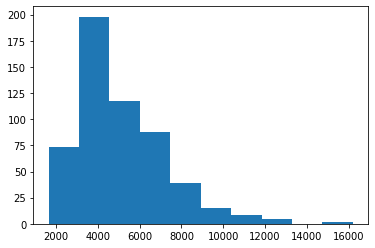

In [49]:
plt.hist(df.area) # df.area == df["area"]
plt.show

## Actual predictions + evaluation metrics

In [24]:
model = LinearRegression()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled) # hard to visualize because it's not 1d anymore

mean_squared_error(y_test, y_pred), mean_absolute_error(
    y_test, y_pred), r2_score(y_test, y_pred)


(1771751116594.0417, 979679.6912959908, 0.6494754192267791)

In [ ]:
## if time -- compare metric results, possibly show how data looks standardized, show min max scalar for sklearn